In [1]:
from fastai.vision.all import *
from fastai.metrics import *
from matplotlib import pyplot as plt

In [2]:
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [3]:
#conda install -c conda-forge ipywidgets

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import torch
import torchvision

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
torch.cuda.empty_cache()

In [8]:
#set path to root directory
path = Path('C:\\Users\\epi\\Desktop\\C_DATASER\\C_DATASET')

In [9]:
path.ls()

(#2) [Path('C:/Users/epi/Desktop/C_DATASER/C_DATASET/men'),Path('C:/Users/epi/Desktop/C_DATASER/C_DATASET/women')]

In [10]:
class_names = []
for folder_name in os.listdir(path):
    class_names.append(folder_name)

In [11]:
class_names

['men', 'women']

In [12]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{path}/{class_name}')
    for image_name in image_names:
        image_path = f'{path}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [13]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [14]:
df.head()

,name,label
0,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Boy_Nextdoor_Fashion_Style,0
1,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Creative_Style,0
2,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Modern_Style,0
3,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Punk_Fashion_Style,0
4,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Sexy_Fashion_Style,0


In [15]:
df.head()

,name,label
0,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Boy_Nextdoor_Fashion_Style,0
1,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Creative_Style,0
2,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Modern_Style,0
3,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Punk_Fashion_Style,0
4,C:\Users\epi\Desktop\C_DATASER\C_DATASET/men/Sexy_Fashion_Style,0


In [16]:
#convert into csv file
df.to_csv(
    path_or_buf=f'{path}/labels.csv',
    index=False
)

In [17]:
dls =ImageDataLoaders.from_folder(
    path=path,
    item_tfms=Resize(224),
    size=224,
    bs=16,
    num_workers=0,  
    valid_pct=0.2, seed=42)

In [18]:
dls.vocab

['Boy_Nextdoor_Fashion_Style', 'Creative_Style', 'Girl_Nextdoor_Style', 'Modern_Style', 'Punk_Fashion_Style', 'Sexy_Fashion_Style', 'Sport_Style', 'Stylish_Style', 'Tomboy_Fashion_Style', 'Vibrant_Fashion_Style', 'Vibrant_Style', 'sexy_Style']

In [19]:
print(dls.vocab, dls.c)

['Boy_Nextdoor_Fashion_Style', 'Creative_Style', 'Girl_Nextdoor_Style', 'Modern_Style', 'Punk_Fashion_Style', 'Sexy_Fashion_Style', 'Sport_Style', 'Stylish_Style', 'Tomboy_Fashion_Style', 'Vibrant_Fashion_Style', 'Vibrant_Style', 'sexy_Style'] 12


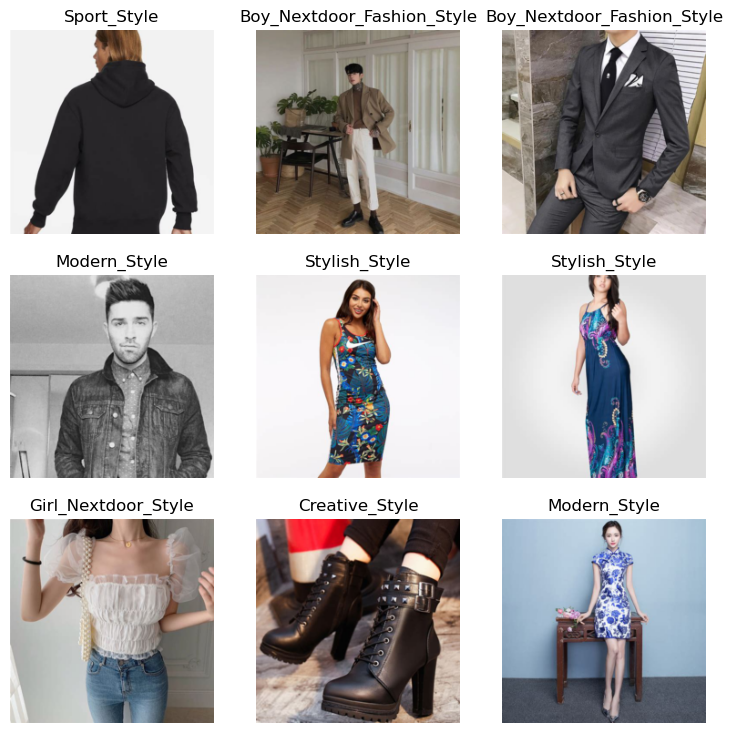

In [20]:
dls.show_batch()

In [21]:
print(len(dls.train_ds), len(dls.valid_ds))

7216 1803


In [22]:
learn = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

In [23]:
defaults.device = torch.device('cuda')

In [ ]:
learn.fine_tune(
    epochs=5
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.601421,1.272629,0.621187,0.378813,1:41:55


epoch,train_loss,valid_loss,accuracy,error_rate,time


In [ ]:
learn.save('M_Image')

In [ ]:
learn.show_results()

In [ ]:
learn.export('image_classifier.pkl')

In [ ]:
new_learn = load_learner(f'{DATASET_PATH}/image_classifier.pkl')

In [ ]:
new_learn.predict(
    item= 'C:\\Users\\epi\\Desktop\\C_DATASER\\C_DATASET\\men\\Creative_Style\\075_324040e8.jpg'
)